In [10]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [11]:
(xtrain,ytrain), (xtest,ytest) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [12]:
xtrain.shape

(60000, 28, 28)

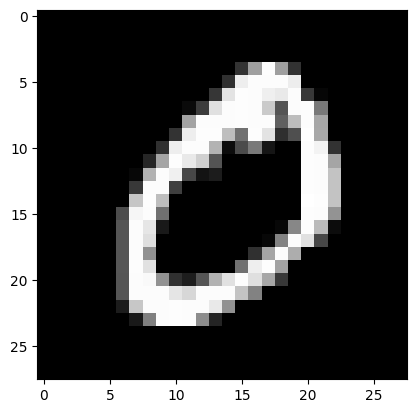

In [15]:
plt.imshow(xtrain[1,:,:],cmap='gray' )
plt.show()

In [16]:
ytrain[1]

np.uint8(0)

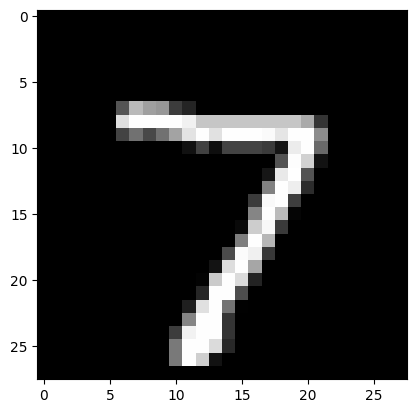

In [17]:
plt.imshow(xtest[0,:,:],cmap='gray' )
plt.show()

In [19]:
ytrain[:50]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3], dtype=uint8)

In [24]:
L = pd.DataFrame(ytrain)
L.value_counts()

0
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

In [25]:
# Represent training and testing samples suitable for Tensorflow backend
x_train = xtrain.reshape(xtrain.shape[0],784).astype('float32')
x_test = xtest.reshape(xtest.shape[0],784).astype('float32')

In [26]:
x_test.shape

(10000, 784)

In [27]:
x_train/=255
x_test/=255

In [28]:
from tensorflow import keras
y_train = keras.utils.to_categorical(ytrain,10)
y_test = keras.utils.to_categorical(ytest,10)

In [29]:
# Initialise the constructor
model = Sequential()

In [30]:
# define model architecture
model.add(Dense(784,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax')) #output layer

In [31]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [32]:
model.fit(x_train,y_train,epochs=10, batch_size=256, verbose=1)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 74ms/step - accuracy: 0.8604 - loss: 0.4992
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - accuracy: 0.9706 - loss: 0.0998
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 55ms/step - accuracy: 0.9806 - loss: 0.0613
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.9884 - loss: 0.0383
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 57ms/step - accuracy: 0.9917 - loss: 0.0286
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 68ms/step - accuracy: 0.9938 - loss: 0.0203
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - accuracy: 0.9952 - loss: 0.0155
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 66ms/step - accuracy: 0.9964 - loss: 0.0119
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.9971 - loss: 0.0088
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - accuracy: 0.9979 - loss: 0.0075


In [33]:
loss, acc = model.evaluate(x_test, y_test,verbose=0)
print('Accuracy:%.3f' %acc)
print('Loss:%.3f' %loss)

Accuracy:0.981
Loss:0.076


In [34]:
y_predict = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [35]:
y_predict[0]

array([1.9220161e-09, 2.8465041e-10, 1.3732946e-08, 5.8991632e-06,
       3.0203275e-12, 1.7728706e-10, 3.3161005e-15, 9.9999416e-01,
       2.3025557e-09, 4.1623444e-08], dtype=float32)

In [36]:
np.argmax(y_predict[0])

np.int64(7)

In [41]:
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))
#print(np.array(y_pred))
cm = metrics.confusion_matrix(ytest,y_pred)
print(cm)

[[ 970    0    2    1    2    0    2    1    2    0]
 [   0 1125    3    1    0    0    2    1    3    0]
 [   1    0 1021    2    2    0    2    1    3    0]
 [   0    0    1 1000    0    1    1    2    2    3]
 [   1    0    4    0  966    0    1    1    0    9]
 [   1    0    0   31    4  838    8    1    7    2]
 [   2    2    1    1    4    1  945    0    2    0]
 [   0    2    9    2    1    0    0 1011    2    1]
 [   4    0    2    9    2    0    0    2  952    3]
 [   1    2    1    7   10    1    0    5    0  982]]


In [43]:
cr = metrics.classification_report(ytest,y_pred)
print(cr)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.95      0.99      0.97      1010
           4       0.97      0.98      0.98       982
           5       1.00      0.94      0.97       892
           6       0.98      0.99      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

